In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df=pd.read_csv('smoking data.csv')

In [3]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [4]:
x=df.drop('smoker',axis=1)
y= df['smoker']

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from pandas.core.dtypes.common import is_numeric_dtype

In [6]:
for column in x.columns:
    if is_numeric_dtype(x[column]):
        continue
    else:
        x[column] = le.fit_transform(x[column])

In [7]:
from sklearn.model_selection import train_test_split as tts
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1)

In [8]:
xtrain

,region,age,sex,bmi,children
744,1,50,1,26.410,0
363,3,21,0,26.400,1
10,0,25,1,26.220,0
970,2,50,0,28.160,3
634,3,51,1,39.700,1
...,...,...,...,...,...
715,3,60,1,28.900,0
905,0,26,0,29.355,2
1096,0,51,0,34.960,2
235,2,40,0,22.220,2


In [9]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [10]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [11]:
clf.predict(xtest)

array(['yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no

In [12]:
clf.score(xtest, ytest) # R Squared Value

0.6666666666666666

In [13]:
clf.score(xtrain, ytrain) # R Squared Value

0.9989316239316239

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt

In [15]:
x_features = x.columns

[Text(287.07690058975055, 1330.6875, 'sex <= 0.5\ngini = 0.327\nsamples = 936\nvalue = [743, 193]'),
 Text(175.54404063855748, 1274.0625, 'bmi <= 22.605\ngini = 0.294\nsamples = 457\nvalue = [375, 82]'),
 Text(43.57483731019523, 1217.4375, 'age <= 45.0\ngini = 0.449\nsamples = 47\nvalue = [31, 16]'),
 Text(39.94360086767896, 1160.8125, 'age <= 38.5\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(25.418655097613883, 1104.1875, 'bmi <= 21.47\ngini = 0.451\nsamples = 35\nvalue = [23, 12]'),
 Text(10.893709327548807, 1047.5625, 'children <= 1.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(7.262472885032538, 990.9375, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(14.524945770065075, 990.9375, 'age <= 28.0\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(7.262472885032538, 934.3125, 'bmi <= 20.663\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(3.631236442516269, 877.6875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(10.893709327548807, 877.6875, 'gini = 0.0\

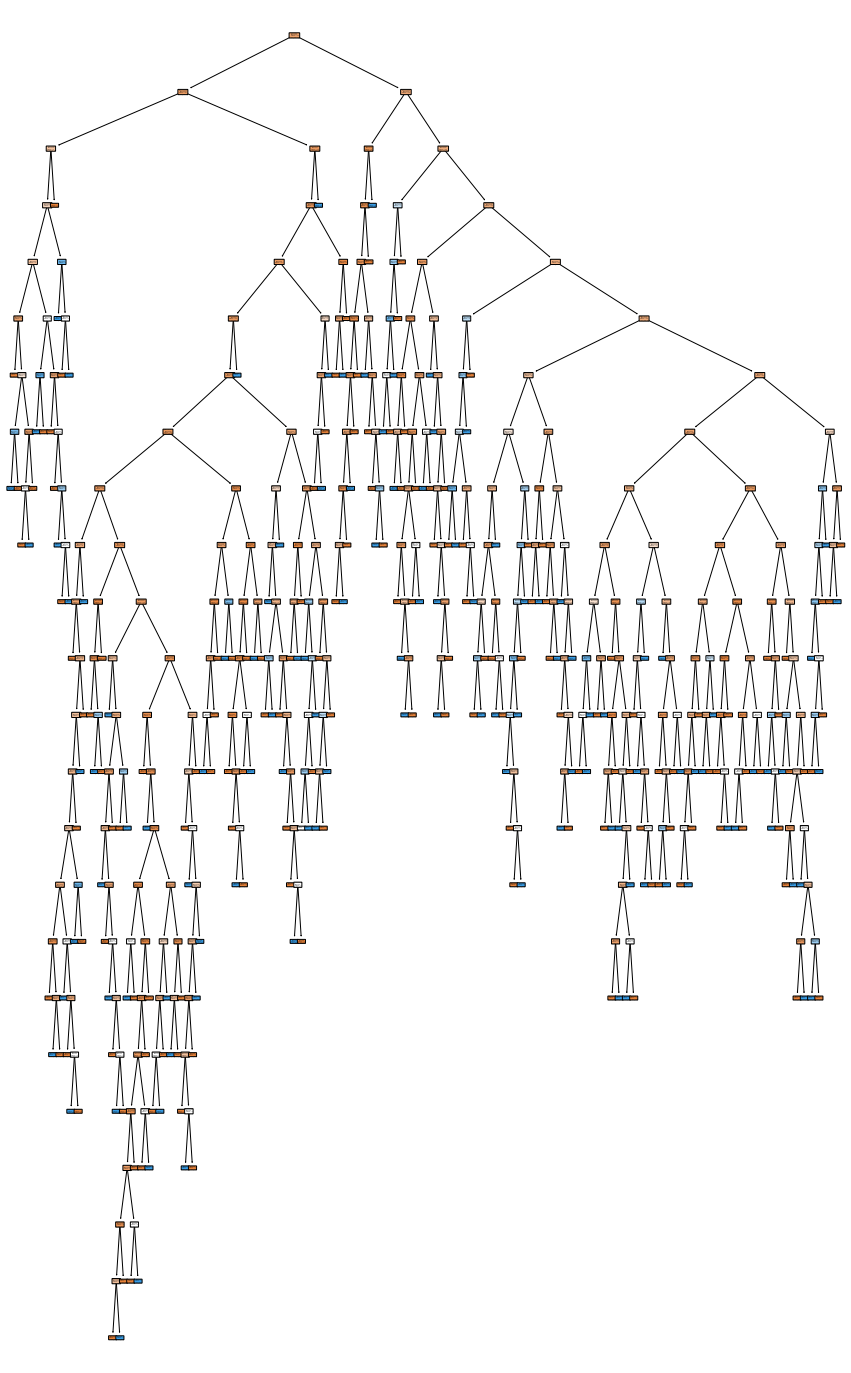

In [18]:
plt.figure(figsize=(15,25))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)